In [1]:
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline


In [2]:
#1 
img1 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/001_IP5_IN_R_RI_01_1.iris.norm.png')
#2 
img2 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/002_IP5_IN_R_LI_01_1.iris.norm.png')
#3
img3 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/003_IP5_IN_R_RI_01_2.iris.norm.png')
img7 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/007_IP5_OU_R_LI_01_4.iris.norm.png')
#10 
img10 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/010_IP5_OU_R_RI_01_2.iris.norm.png')

img3b = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/003_IP5_IN_F_RI_01_1.iris.norm.png')
img14 = mpimg.imread('C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/014_IP5_OU_F_RI_01_1.iris.norm.png')


img = img14

In [3]:
def crop(img):
    return img[:, 150:450]  

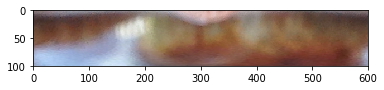

In [4]:
plt.imshow(img) 
img = crop(img)

In [5]:
def hide_channels(img, first,second):
    new_image = img.copy()
    new_image[:, :, first] = 0   
    new_image[:, :, second] = 0   
    return new_image

def get_channel(img,channel):
    new_image = img.copy()
    single_channel = new_image[..., channel]
    median = np.median(single_channel)
    limit_high = median + 0.1
    limit_low = median - 0.1
    single_channel[single_channel > limit_high] = limit_low
    single_channel[single_channel < limit_low] = limit_low
    single_channel = single_channel - limit_low
    #single_channel = img[..., channel]
    #single_channel[single_channel > threshold] = threshold
    return single_channel
    
def show_channel(img,channel):
    new_image = get_channel(img,channel)
    show_image(new_image)
    
def show_image(img):
    plt.imshow(img, cmap="Greys")
    plt.colorbar()    
    
def remove_top_bottom(img,rowFrom,rowTo,columnFrom,columnTo,range_smooth, threshold = 0):
    new_image = img.copy()
    for column in range(columnFrom,columnTo):
        for row in range(rowFrom,rowTo):
            if new_image[row,column] > threshold:
                new_image[row,column] = 0
            else:
                is_edge = False
                for value in range(range_smooth):
                    if row+value < 100 and row+value >= 0 and new_image[row+value,column] == 0:
                        is_edge = True
                        break;
                if is_edge:
                    for value in range(range_smooth):
                        if row+value < 100 and row+value >= 0:
                            new_image[row+value,column] = 0
                break
    return new_image

def remove_top(img,threshold = 0):
    return remove_top_bottom(img,0,50,0,300,5,threshold)
    new_image = img.copy()
    range_smooth = 5
    for column in range(0,300):
        for row in range(0,50):
            if new_image[row,column] > threshold:
                new_image[row,column] = 0
            else:
                is_edge = False
                for value in range(range_smooth):
                    if row+value < 100 and new_image[row+value,column] == 0:
                        is_edge = True
                        break;
                if is_edge:
                    for value in range(range_smooth):
                        if row+value < 100:
                            new_image[row+value,column] = 0
                break
    return new_image
    
def remove_left(img):
    new_image = img.copy()
    first_column = -1
    for column in range(0,300):
        for row in range(0,100):
            if new_image[row,column] > 0:
                first_column = column
                break
        if first_column > -1:
            break

    new_image = new_image[:,first_column:300]
    result = np.zeros((100,300))

    result[:new_image.shape[0],:new_image.shape[1]] = new_image
    return result

def preprocess_image(img,channel,threshold = 0.15, noise_filter=2, threshold_top = 0):
    single_channel = get_channel(img,channel)
    single_channel[single_channel < threshold] = 0  
    single_channel = scipy.ndimage.median_filter(single_channel, noise_filter)    
    single_channel = remove_top(single_channel,threshold_top)
    single_channel = remove_left(single_channel)
    return single_channel

def get_classifier(image):
    classifier = []
    for column in range(0,300):
        counter = 0
        for row in range(0,100):
            if image[row,column] > 0:
                counter += 1
        classifier.append(counter)
    return classifier

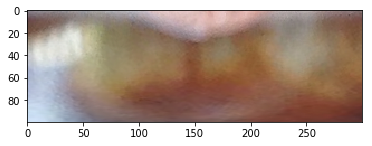

In [6]:
plt.imshow(img)   

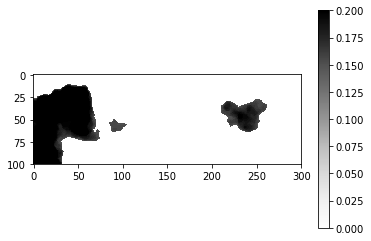

In [23]:
#processed = preprocess_image(img,0,0.15,5,0.175)
show_image(preprocess_image(img,0,0.15,5,0.18))
#processed[:,0]


In [8]:
img.shape

(100, 300, 3)

In [9]:
np.max(get_channel(img,0))

0.20000002

In [10]:
np.average(get_channel(img,0))

0.10476378

In [11]:
np.median(get_channel(img,0))

0.099999994

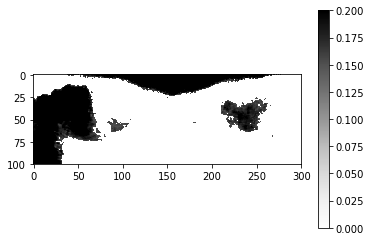

In [12]:
single_channel = get_channel(img,0)
single_channel[single_channel < 0.15] = 0
#single_channel = scipy.ndimage.median_filter(single_channel, 1)

show_image(single_channel)

In [13]:
image = preprocess_image(img,0,0.15,5)


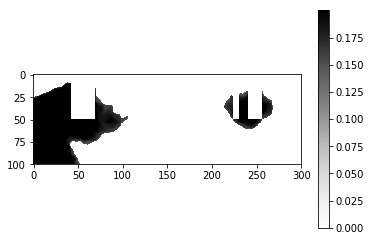

In [14]:
show_image(preprocess_image(img,1,0.15,5))

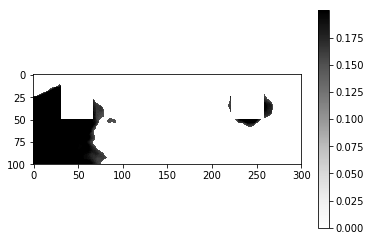

In [15]:
show_image(preprocess_image(img,2,0.15,5))

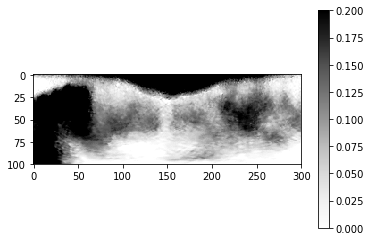

In [16]:
show_channel(img,0)

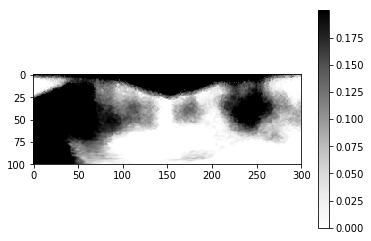

In [17]:
show_channel(img,1)

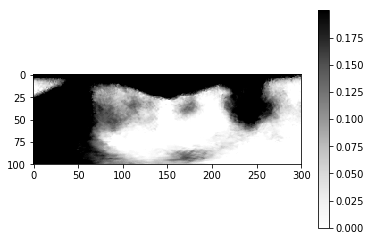

In [18]:
show_channel(img,2)

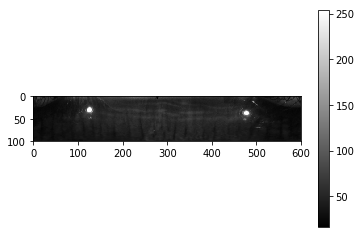

In [19]:
from PIL import Image

fname = 'C:/Users/tomas.chladek/Documents/Personal/Uni/Master/3rd/ROZ/irisClassifier/__venv__/irises_MICHE_iPhone5_norm/001_IP5_IN_R_RI_01_1.iris.norm.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.colorbar()

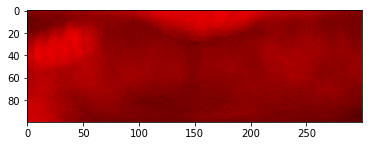

In [20]:
plt.imshow(hide_channels(img,1,2))


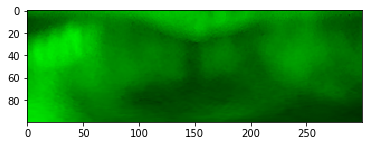

In [21]:
plt.imshow(hide_channels(img,0,2))

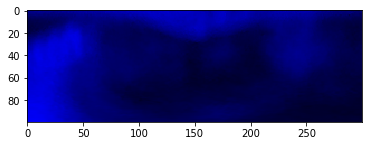

In [22]:
plt.imshow(hide_channels(img,0,1))
